In [1]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_extraction.get_indices as get_indices

In [2]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop
json_filename = [r'fourth_experiments_2410\241017\2024-10-17_16-35-45_ElsaFirstSolo.json'] 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'

json_filenames_all_solo = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json',
                              r'first_experiments_2409\240913\2024-09-13_11-53-34_YansuSecondSolo.json',
                              r'first_experiments_2409\240913\2024-09-13_11-23-50_JerryFirstSolo.json',
                              r'first_experiments_2409\240913\2024-09-13_11-53-56_JerrySecondSolo.json',
                              
                              r'second_experiments_2409\240927\2024-09-27_14-14-31_SaraFirstSolo.json',
                              r'second_experiments_2409\240927\2024-09-27_14-45-55_SaraSecondSolo.json',
                              r'second_experiments_2409\240927\2024-09-27_14-14-42_EmilyFirstSolo.json',
                              r'second_experiments_2409\240927\2024-09-27_14-45-46_EmilySecondSolo.json',
                                                
                              r'third_experiments_2410\241017\2024-10-17_14-20-28_ShamirFirstSolo.json',
                              r'third_experiments_2410\241017\2024-10-17_14-50-03_ShamirSecondSolo.json',
                              r'third_experiments_2410\241017\2024-10-17_14-20-50_AbigailFirstSolo.json',
                              r'third_experiments_2410\241017\2024-10-17_14-51-22_AbigailSecondSolo.json',
            
                              r'fourth_experiments_2410\241017\2024-10-17_16-35-45_ElsaFirstSolo.json',
                              r'fourth_experiments_2410\241017\2024-10-17_17-12-29_ElsaSecondSolo.json',
                              r'fourth_experiments_2410\241017\2024-10-17_16-36-0_ZimoFirstSolo.json',
                              r'fourth_experiments_2410\241017\2024-10-17_17-11-46_ZimoSecondSolo.json']


json_filenames_all_social = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json',
                               r'second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json',
                               r'third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json',
                               r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']


In [3]:
df, trial_list = prepare_data.prepare_data(data_folder, json_filename)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-35-45_ElsaFirstSolo.json
Loading complete.
Preprocessing complete.


In [4]:
## PROBABILITY CHOSE HIGH PLOTS ##

In [5]:
# for each trial
    # find chosen wall
    # was this High wall? 

# divide high_wall_chosen count by total_count

# do the above for each individual player

# plot as a line graph with 2 connected points, across solo to social

In [6]:
def probability_choose_high_social(data_folder, json_filename, trial_type=globals.HIGH_LOW, wall_sep=None):

    # get the dataframe for this session
    df, trial_list = prepare_data.prepare_data(data_folder, json_filename)

    # filter trial list to include HighLow trials only
    if trial_type is not None:
        trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
        trial_list = [trial_list[i] for i in trial_list_indices]
    # print(f"len trial list = {len(trial_list)}")

    # filter trial list to include specific wall separation
    if wall_sep is not None:
        trial_list_indices =  get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
        trial_list = [trial_list[i] for i in trial_list_indices]

    # find the high wall trials and the indices where each player won
    high_wall_chosen = get_indices.was_high_wall_chosen(trial_list)
    # print(f"high_wall_chosen = {high_wall_chosen}")
    player0_win_indices = get_indices.get_player_win_indices(trial_list, player_id=0)
    # print(f"player0_win_indices = {player0_win_indices}")
    player1_win_indices = get_indices.get_player_win_indices(trial_list, player_id=1)
    # print(f"player1_win_indices = {player1_win_indices}")

    # create an array of size player_win_indices that is True where this win was a High wall choice 
    player0_wins_high = np.zeros(player0_win_indices.size)
    for i in range(player0_win_indices.size):
        trial_idx = player0_win_indices[i]
        player0_wins_high[i] = True if high_wall_chosen[trial_idx] else False

    player1_wins_high = np.zeros(player1_win_indices.size)
    for i in range(player1_win_indices.size):
        trial_idx = player1_win_indices[i]
        player1_wins_high[i] = True if high_wall_chosen[trial_idx] else False

    probability_player0_choose_high = player0_wins_high[player0_wins_high == True].size/player0_wins_high.size
    probability_player1_choose_high = player1_wins_high[player1_wins_high == True].size/player1_wins_high.size

    return probability_player0_choose_high, probability_player1_choose_high

In [31]:
def probability_choose_high_solo(data_folder, json_filename, trial_type=globals.HIGH_LOW, wall_sep=None):

    # get the dataframe for this session
    df, trial_list = prepare_data.prepare_data(data_folder, json_filename)

    # filter trial list to include HighLow trials only
    if trial_type is not None:
        trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
        trial_list = [trial_list[i] for i in trial_list_indices]


    # filter trial list to include specific wall separation
    if wall_sep is not None:
        trial_list_indices =  get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
        trial_list = [trial_list[i] for i in trial_list_indices]

    high_wall_chosen = get_indices.was_high_wall_chosen(trial_list)

    probability_choose_high = high_wall_chosen[high_wall_chosen == True].size/trial_list_indices.size


    return probability_choose_high

In [42]:
%%capture
# loop through all social sessions
probability_choose_high_social_array = np.zeros((len(json_filenames_all_social), 2))
for json_filename_idx in range(len(json_filenames_all_social)):

    # get the dataframe for this session
    json_filename = json_filenames_all_social[json_filename_idx]

    # find the probability of choosing high for each player
    probability_player0_choose_high, probability_player1_choose_high = probability_choose_high_social(data_folder, [json_filename],
                                                                                                      trial_type=globals.HIGH_LOW,
                                                                                                      wall_sep=None)

    # add this to the sessions array
    probability_choose_high_social_array[json_filename_idx,:] = [probability_player0_choose_high, probability_player1_choose_high]
    
        

In [43]:
probability_choose_high_social_array.ravel()

array([0.6744186 , 0.6779661 , 0.63636364, 0.84782609, 0.75675676,
       0.60714286, 0.65909091, 0.75      ])

In [44]:
%%capture
# loop through all solo sessions
# remember to combine 2 consecutive indices
probability_choose_high_solo_array = np.zeros((int(len(json_filenames_all_solo)/2)))
for json_filename_idx in range(0, len(json_filenames_all_solo), 2):

    # get the dataframe for this session
    json_filenames = [json_filenames_all_solo[json_filename_idx], json_filenames_all_solo[json_filename_idx + 1]]

    # find the probability of choosing high for each player
    probability_choose_high = probability_choose_high_solo(data_folder, json_filenames, wall_sep=None)

    # add this to the sessions array
    probability_choose_high_solo_array[int(json_filename_idx/2)] = probability_choose_high
    
        

In [45]:
probability_choose_high_solo_array

array([0.68421053, 0.85714286, 0.96363636, 0.69090909, 0.80952381,
       0.96363636, 0.87323944, 0.83606557])

In [46]:
%%capture
# loop through all solo sessions
# separate out first and second solo sessions
probability_choose_high_solo_array_separated_sessions = np.zeros(int(len(json_filenames_all_solo)))
for json_filename_idx in range(0, len(json_filenames_all_solo)):

    # get the dataframe for this session
    json_filenames = json_filenames_all_solo[json_filename_idx]

    # find the probability of choosing high for each player
    probability_choose_high = probability_choose_high_solo(data_folder, [json_filenames], wall_sep=None)

    # add this to the sessions array
    probability_choose_high_solo_array_separated_sessions[int(json_filename_idx)] = probability_choose_high
    
        

In [47]:
probability_choose_high_solo_array_separated_sessions

array([0.88461538, 0.51612903, 0.89285714, 0.82142857, 0.93333333,
       1.        , 0.55172414, 0.84615385, 0.75      , 0.84615385,
       0.96428571, 0.96296296, 0.95454545, 0.83673469, 0.8       ,
       0.84313725])

In [48]:
probability_choose_high_solo_array_first_session = probability_choose_high_solo_array_separated_sessions[0::2]
probability_choose_high_solo_array_first_session

array([0.88461538, 0.89285714, 0.93333333, 0.55172414, 0.75      ,
       0.96428571, 0.95454545, 0.8       ])

In [49]:
probability_choose_high_solo_array_second_session = probability_choose_high_solo_array_separated_sessions[1::2]
probability_choose_high_solo_array_second_session

array([0.51612903, 0.82142857, 1.        , 0.84615385, 0.84615385,
       0.96296296, 0.83673469, 0.84313725])

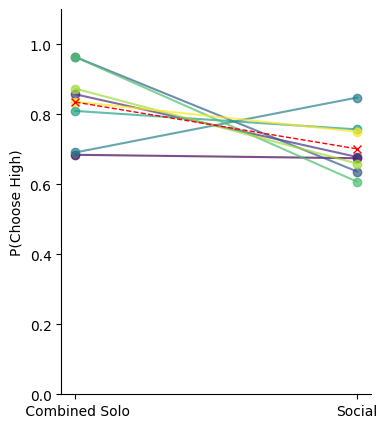

In [50]:
# probability of choose high in solo vs social
# data
solo_combined_p_choose_high = probability_choose_high_solo_array
social_p_choose_high = probability_choose_high_social_array.ravel()

# Number of individuals
individuals = np.arange(len(solo_combined_p_choose_high))

# Generate distinct colors for each individual
colors = plt.cm.viridis(np.linspace(0, 1, len(individuals)))

# Plotting
plt.figure(figsize=(4, 5))

# Plot lines for each individual
for i in individuals:
    plt.plot([0, 1], [solo_combined_p_choose_high[i], social_p_choose_high[i]], 
             marker='o', linestyle='-', color=colors[i], alpha=0.7)

plt.plot([0,1], [np.mean(solo_combined_p_choose_high), np.mean(social_p_choose_high)],
                    marker='x', color='red', label='Average', linewidth=1, linestyle='--')

plt.ylabel('P(Choose High)')
plt.xticks([0, 1], [' Combined Solo', 'Social'])
plt.ylim(0, 1.1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

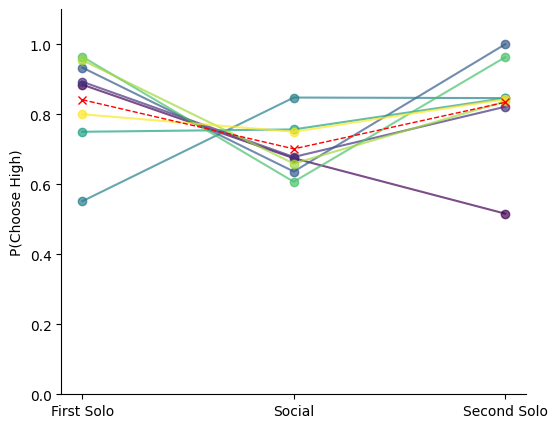

In [51]:
# probability of choose high in solo vs social
# data
solo_first_session_p_choose_high = probability_choose_high_solo_array_first_session
solo_second_session_p_choose_high = probability_choose_high_solo_array_second_session
social_p_choose_high = probability_choose_high_social_array.ravel()

# Number of individuals
individuals = np.arange(len(solo_first_session_p_choose_high))

# Generate distinct colors for each individual
colors = plt.cm.viridis(np.linspace(0, 1, len(individuals)))

# Plotting
plt.figure(figsize=(6, 5))

# Plot lines for each individual
for i in individuals:
    plt.plot([0, 1, 2], [solo_first_session_p_choose_high[i], social_p_choose_high[i], solo_second_session_p_choose_high[i]], 
             marker='o', linestyle='-', color=colors[i], alpha=0.7)

plt.plot([0,1,2], [np.mean(solo_first_session_p_choose_high), np.mean(social_p_choose_high), np.mean(solo_second_session_p_choose_high)],
                    marker='x', color='red', label='Average', linewidth=1, linestyle='--')


plt.ylabel('P(Choose High)')
plt.xticks([0, 1, 2], ['First Solo', 'Social', 'Second Solo'])
plt.ylim(0, 1.1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()